In [2]:
import numpy as np
import lop
import matplotlib.pyplot as plt

In [3]:
folder_loc = '/home/ian/repos/lop/experiments/results/'
folder = 'AT_RANDOM_model_gp_user_perfect_fake_min_no_env5_2024-04-12_13-09-35/run_8/'
filename = 'trainitr_3_viz.npz'

data = np.load(folder_loc+folder+filename, allow_pickle=True)

In [4]:
print(list(data.keys()))


['pts', 'fake_ut', 'pred_ut', 'pred_sigma', 'GP_pts', 'GP_pref', 'GP_prior_idx']


In [5]:
pts = data['pts']

xs = pts[0:25,0]
ys = pts[0::25,1]
print(xs)
print(ys)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5   ]
[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5   ]


<ipython-input-11-c45fdefb581d>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolor(xs, ys, pred_ut.reshape((len(xs), len(ys))), cmap=cmap)


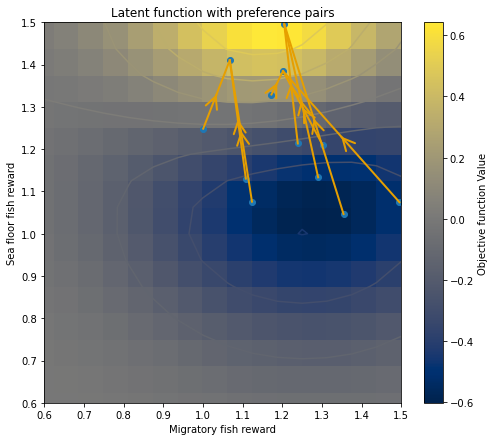

In [11]:
gp_pref = data['GP_pref']
GP_pts = data['GP_pts']
pred_ut = data['pred_ut']


model = lop.PreferenceGP(lop.RBF_kern(0.5,0.7))
model.X_train = GP_pts
model.y_train = gp_pref

plt.figure(figsize=(8,7))
ax = plt.gca()

model.plot_preference(ax=ax, F=0, width=2, head_size=30, alpha=1.0)

cmap = 'cividis'
cax = ax.pcolor(xs, ys, pred_ut.reshape((len(xs), len(ys))), cmap=cmap)
ax.contour(xs, ys, pred_ut.reshape((len(xs), len(ys))), cmap=cmap)
plt.scatter(GP_pts[:,0], GP_pts[:,1])

plt.xlim([0.6,1.5])
plt.ylim([0.6,1.5])

plt.xlabel('Migratory fish reward')
plt.ylabel('Sea floor fish reward')

plt.colorbar(cax, label='Objective function Value')

plt.title('Latent function with preference pairs')

plt.show()